In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
plt.switch_backend('tkagg')

In [2]:
src = rasterio.open('../DEMs/clpx/bare_earth/orthos/clpx_ortho_06_05_2017.tif')

In [3]:
ortho = src.read()

In [4]:
ortho.shape

(4, 11100, 13750)

In [5]:
ortho = ortho[0:3, :, :]
ortho.shape

(3, 11100, 13750)

In [6]:
ortho_sum = np.nansum(ortho, axis=0)
ortho_sum.shape

(11100, 13750)

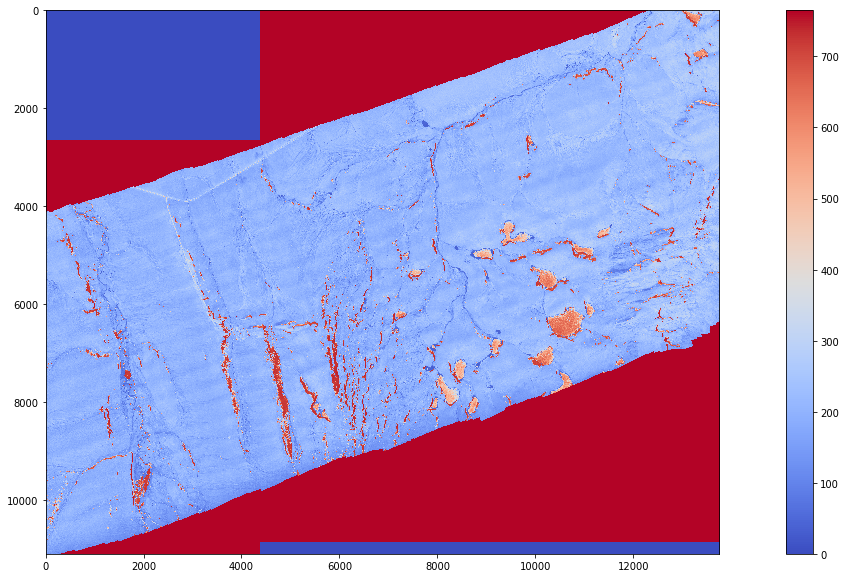

In [7]:
cmap = plt.get_cmap('coolwarm')
cmap.set_under('white')
plt.figure(figsize=(24,10))
plt.imshow(ortho_sum, vmin=0, vmax=765, cmap=cmap)
plt.colorbar()

In [8]:
ortho_sum[ortho_sum == 765] = 0

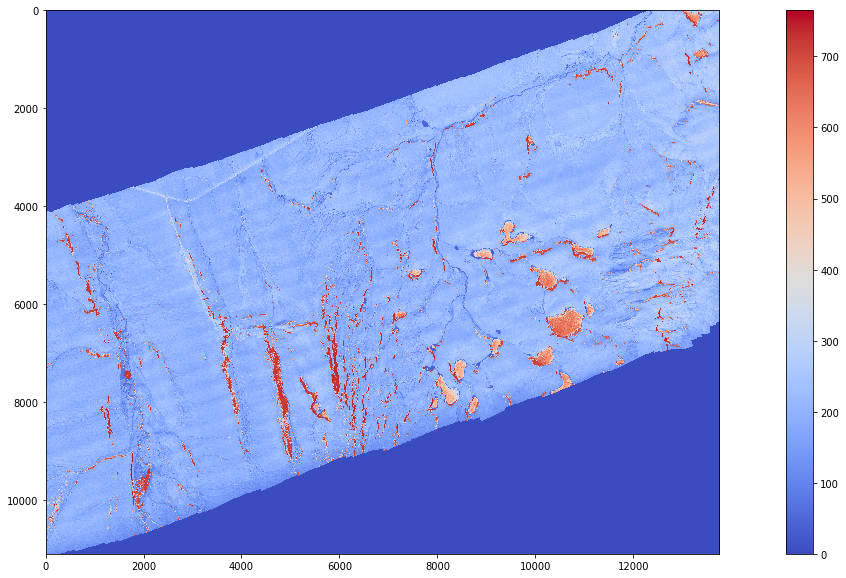

In [9]:
cmap = plt.get_cmap('coolwarm')
cmap.set_under('white')
plt.figure(figsize=(24,10))
plt.imshow(ortho_sum, vmin=0, vmax=765, cmap=cmap)
plt.colorbar()

In [10]:
ortho_sum[ortho_sum == 0] = -9999

In [11]:
profile = src.profile
profile['count'] = 1
profile['nodata'] = -9999
profile['dtype'] = 'float32'
profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999, 'width': 13750, 'height': 11100, 'count': 1, 'crs': CRS({'init': 'epsg:32606'}), 'transform': Affine(1.0, 0.0, 401900.0,
       0.0, -1.0, 7620200.0), 'tiled': False, 'interleave': 'pixel'}

In [12]:
with rasterio.open('../DEMs/clpx/bare_earth/orthos/clpx_ortho_06_05_2017_sum.tif', 'w', **profile) as dst:
    dst.write(ortho_sum.astype('float32'), 1)